# **Scaling**

# 1. Standard Scaling
  Standard scaling (also known as Z-Score normalization) is a method of scaling features so that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. This is done by subtracting the mean of each feature from the data points and then dividing by the standard deviation. This is very useful for algorithms that assume that the data is normally distributed, such as linear regression, logistic regression, and support vector machines.

  The Formula for standard scaling is:

z = (x - μ) / σ
    
where:

z = standardized value\
x = original value\
μ = mean of the feature\
σ = standard deviation of the feature

In [44]:
# Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [41]:
# Make an Example Dataset
df = {
    'Age': [25, 30, 35, 40, 45],
    'Height': [165,170, 175, 180, 185],
    'Weight': [55, 60, 65, 70, 75]
}

# Convert to DataFrame
df = pd.DataFrame(df)
df

,Age,Height,Weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [42]:
# Import the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)
scaled_data                              # It will show data in array format

# CNow we convert scaled data into pandas DataFrame to make it more readable
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Age,Height,Weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# 2. Min-Max Scaling
  Min-Max scaling (also known as normalization) is a method of scaling features to a fixed range, usually 0 to 1. This is done by subtracting the minimum value of each feature from the data points and then dividing by the range (maximum - minimum). This is useful for algorithms that do not assume any specific distribution of the data, such as k-nearest neighbors and neural networks.

  The Formula for min-max scaling is:

x' = (x - min) / (max - min)


where:

x' = normalized value\
x = original value\
min = minimum value of the feature\
max = maximum value of the feature

In [39]:
# Import the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# CNow we convert scaled data into pandas DataFrame to make it more readable
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Age,Height,Weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# 3. Max-Absolute Scaling
  Max-Absolute scaling is a method of scaling features by dividing each data point by the maximum absolute value of the feature. This scales the data to the range [-1, 1] while preserving the sparsity of the data. This is particularly useful for data that is already centered around zero and for algorithms that are sensitive to the scale of the data, such as linear regression and support vector machines.

  The Formula for max-absolute scaling is:

x' = x / max(|x|)

where:

x' = scaled value\
x = original value\
max(|x|) = maximum absolute value of the feature

In [43]:
# Import the scaler
scaler = MaxAbsScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# CNow we convert scaled data into pandas DataFrame to make it more readable
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Age,Height,Weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# 4. Robust Scaling
  Robust scaling is a method of scaling features using statistics that are robust to outliers. Instead of using the mean and standard deviation, robust scaling uses the median and the interquartile range (IQR). This makes it less sensitive to outliers in the data.
  
The Formula for robust scaling is:
   
x' = (x - median) / IQR

where:

x' = scaled value\
x = original value\
median = median of the feature\
IQR = interquartile range of the feature (Q3 - Q1)

In [45]:
# Import the scaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# CNow we convert scaled data into pandas DataFrame to make it more readable
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Age,Height,Weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


# **Normalization**
Normalization is the process of adjusting values measured on different scales to a common scale, often prior to averaging. In the context of machine learning and data preprocessing, normalization typically refers to scaling individual samples to have a unit norm. This is particularly useful when the direction of the data points is more important than their magnitude, such as in text classification or clustering tasks.

The most common normalization techniques include:

1. Box-Cox Transformation
2. yeo-Johnson Transformation
3. quantile Transformation
4. Log Transformation

In [11]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Generate non-normal data (exponential distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['Values'])
df.head()
df.shape

(1000, 1)

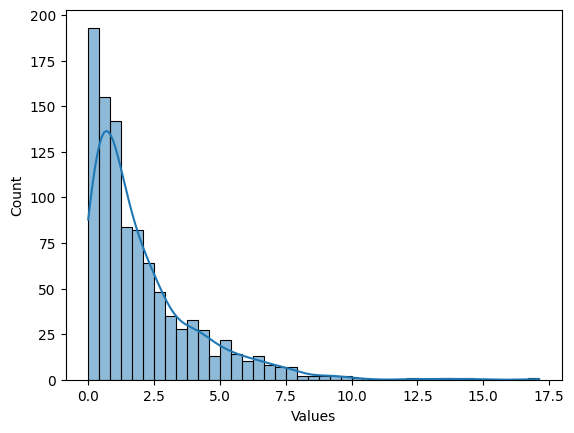

In [13]:
# Create a hist plot to visualize the distribution
sns.histplot(df, x='Values', kde=True)
plt.show()

In [30]:
# Import the powertransformer, quantile transformer function from sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# Apply Box-Cox and Yeo-Johnson transformations

pt_boxcox = PowerTransformer(method='box-cox', standardize=True) # tansform features to be more Gaussian-like(normal distribution)
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
qt_quantile = QuantileTransformer(output_distribution='normal')
 
# Box-Cox transformation can only be applied to positive data. Yeo-Johnson can handle zero and negative values.

#standardize=True: If set to True, the transformed data will have a mean of 0 and a standard deviation of 1. If False, 
# the transformed data will retain its original scale. By default, it is set to True.

# Fit and transform the data
df['Box_Cox'] = pt_boxcox.fit_transform(df[['Values']] + 1)  # Box-Cox requires only positive values
df['Yeo_Johnson'] = pt_yeojohnson.fit_transform(df[['Values']])
df['Quantile'] = qt_quantile.fit_transform(df[['Values']])

df.head()

,Values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


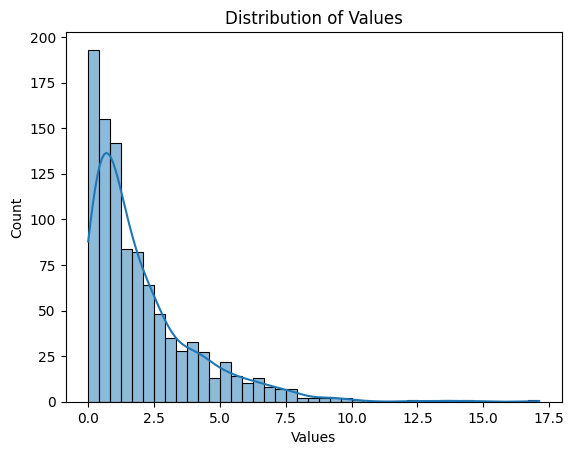

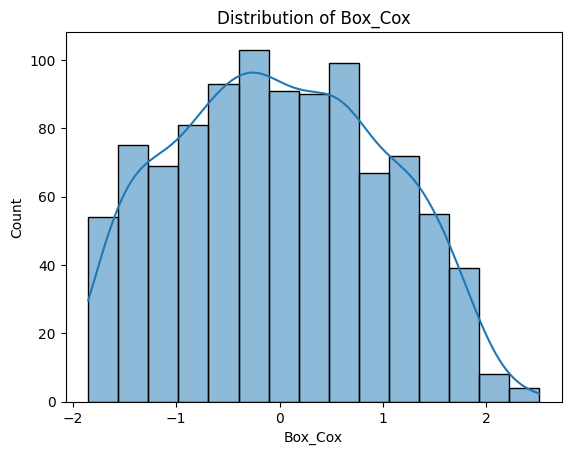

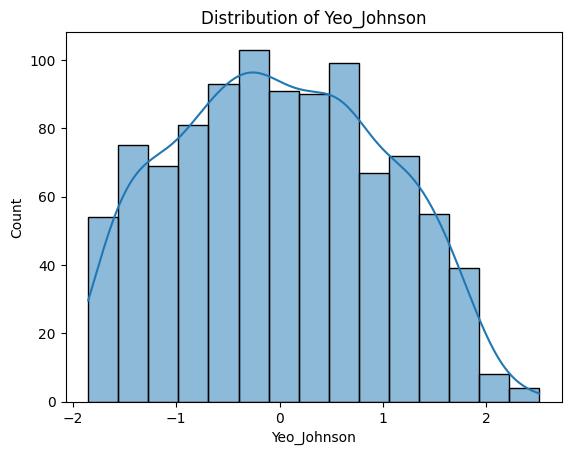

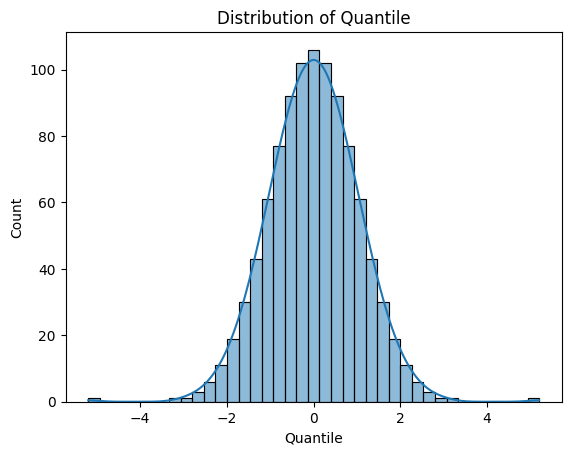

In [31]:
# Create a histogram to visualize the distribution after transformations for all three columns using for loop
for col in df.columns:
    sns.histplot(df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

`Note:` Quantile Transformation plays an important role to noramalize the data. Quantile Transformer transforms the features to follow a uniform or a normal distribution. It is a non-parametric method that uses the rank of the data points to map them to a desired distribution. This is particularly useful for handling outliers and skewed distributions, as it can effectively spread out the most frequent values and compress the range of the less frequent values.

# L1 Normalization (Least Absolute Deviations)
L1 normalization, also rescales each sample (row), but with a different approach, ensuring the sum of the absolute value is in each row. the L1 norm is calculated as the sum of the absolute vector values. \
The formula for L1 normalization is: 

x' = x / ||x||₁

where:

x' = normalized vector (x-nomalized)\
x = original vector\
||x||₁ = L1 norm of the vector (sum of absolute values of the components)

In [33]:
from sklearn.preprocessing import Normalizer

# Sample data
data = [[1,1,1], [1,1,0], [1,0,0]]

# Create a Normalizer object
normalizer = Normalizer(norm='l1')

# Fit and transform the data
normalized_data = normalizer.fit_transform(data)
normalized_data

array([[0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        ]])

1. Z-score Normalization (Standardization)
    1. StandardScaler
 2. Min-Max Normalization
    1. MinMaxScaler

# Log **Transformation**
Log transformation is a mathematical technique used to transform data by applying the logarithm function. This transformation is particularly useful for handling skewed data, reducing the impact of outliers, and stabilizing variance. Log transformation can help make the data more normally distributed, which is often a requirement for many statistical analyses and machine learning algorithms.

The formula for log transformation is:

y = log(x)

where:

y = transformed value\
x = original value (must be greater than 0)

In [55]:
import pandas as pd
import numpy as np

# Example Dataset with skewed distribution
data = {"Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000]}
df = pd.DataFrame(data)
df

,Values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


<Axes: xlabel='Values', ylabel='Count'>

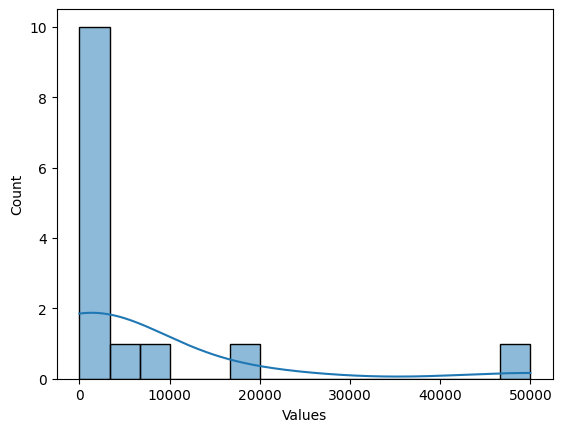

In [56]:
# Visualize the original distribution with skewness
sns.histplot(df, x='Values', kde=True)

In [57]:
# Transform the data using log transformation
df['Log_Transformed'] = np.log(df['Values'])
df

,Values,Log_Transformed
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


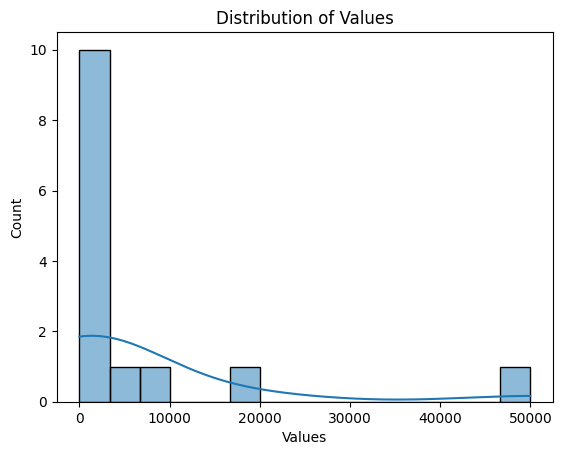

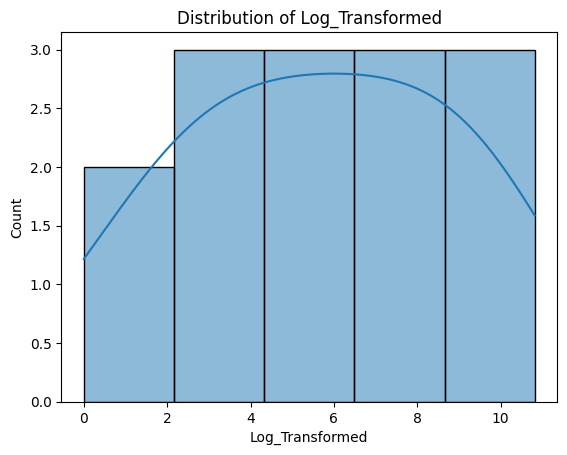

In [59]:
# Draw the histogram to visualize the distribution after log transformation
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Summary
1. Scaling and normalization are essential preprocessing steps in machine learning that help improve model performance and convergence. Scaling adjusts the range of features without changing the shape of its distribution, while normalization adjusts the distribution of features and also change the shape of the distribution.
2. Support vector machines, k-nearest neighbors, and neural networks are some of the algorithms that are sensitive to the scale of the data.
3. Normalization is typically used when the dataset has skewed distributions or outliers, while scaling is used when the data is normally distributed.